In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, exp, pi
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})

1.1 多項式曲線フィッティング

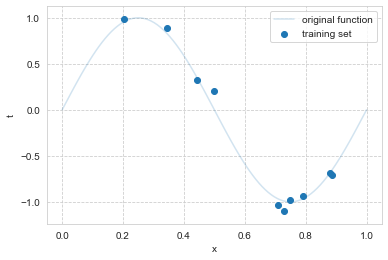

In [2]:
N = 10
x = np.random.rand(N)
t = sin(2*pi*x)+np.random.normal(0, 0.1, N)
x_s = np.linspace(0, 1, 100)
t_s = sin(2*pi*x_s)
plt.plot(x_s, t_s, label="original function", alpha=0.2)
plt.scatter(x, t, label="training set")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.savefig("figures/regression.png", dpi=400)

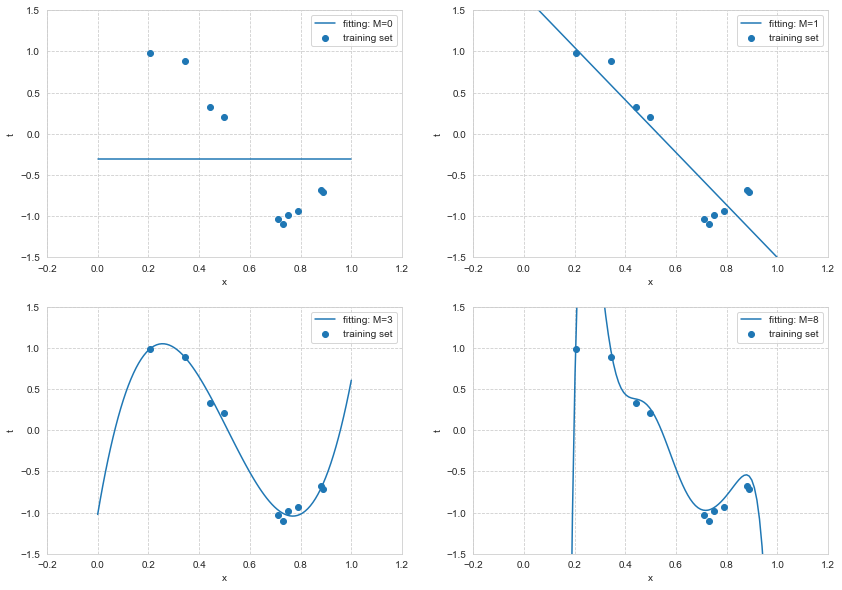

In [3]:
fig = plt.figure(figsize=(14, 10))
for ind, M in enumerate([0, 1, 3, 8]):
    y = 0
    A = np.zeros((M+1, M+1))
    T = np.zeros(M+1)
    for i in range(M+1):
        for n in range(N):
            for j in range(M+1):
                A[i, j] += x[n] ** (i+j)
            T[i] += x[n]**i * t[n]
    W = np.linalg.inv(A) @ T
    for i in range(M+1):
        y += W[i] * x_s**i
    plt.subplot(2, 2, ind+1)
    plt.scatter(x, t, label="training set")
    plt.plot(x_s, y, label=f"fitting: M={M}")
    plt.xlim(-0.2, 1.2)
    plt.ylim(-1.5, 1.5)
    plt.xlabel("x")
    plt.ylabel("t")
    plt.legend()
plt.savefig("figures/regression2.png", dpi=400)

